## Discovery Document - After trial.ipynb

After doing some investiation as well as discussing the logic puzzle with peers, it seems to be that the answer lies within how to <i>swap</i> islanders on the seesaw instead of removing them from the mix

Also, this will give me a new templete to fix the error I was having before since I can't assign 0 to the weights of the villigers

In [5]:
import random
import matplotlib.pyplot as plt

In [19]:
# PROBLEM SETUP
islanders = [1] * 12
rand_index = random.randint(0, 11)  # randomly select an index
rand_value = random.choice([0.5, 1.5])  # randomly select a value slight over or underweight
islanders[rand_index] = rand_value  # assign the random value to the random index

### Investiation/Visualization
I would like to see how I can begin to just visualize who is on what side of the seesaw in order to make the code more conceptually easy to see what it is doing

[1, 1, 1, 1, 1, 1.5, 1, 1, 1, 1, 1, 1]


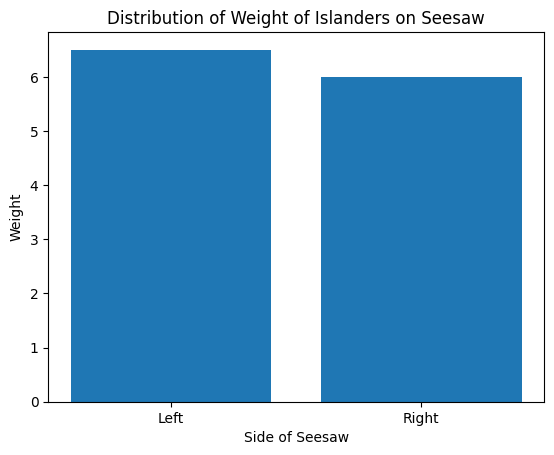

In [20]:
# Split the islanders into left and right sides
left_side = islanders[:6]
right_side = islanders[6:]

# Calculate the weights of each side
left_weight = sum(left_side)
right_weight = sum(right_side)

# Create a bar chart of the weights
fig, ax = plt.subplots()
ax.bar(['Left', 'Right'], [left_weight, right_weight])

# Label the axes and title the chart
ax.set_xlabel('Side of Seesaw')
ax.set_ylabel('Weight')
ax.set_title('Distribution of Weight of Islanders on Seesaw')

print(islanders)


### Finding a Ground Truth

One idea was to first determine if our islander was heavier or lighter since we don't know that initally. Let's see if this could be done with groups of 4 that swap being on and off the seesaw

Here are the groups:
- Group A: first 4 people => left side of seesaw
- Group B: next 4 people => right side of seesaw
- Group C: final 4 people => initally off the seeaw

Note: My goal is to write the code in order to produce the solution to the logic puzzle for humans, not just to be able to solve it

In [30]:
def find_different_4(islanders):
    left_side = islanders[:4]
    right_side = islanders[4:8]

    group_A = sum(left_side)
    group_B = sum(right_side)

    val_sign = 0 # is the person overweight (+1) or under (-1)
    val_group = "0" # will be A, B, or C
    true_weight_4 = 0 # how much a side should weigh
    true_weight_1 = 0 # how much one person should weigh => will make larger group math easier

    if group_A == group_B: # get rid one one since neither of these contain the value
        true_weight_4 = group_A
        true_weight_1 = true_weight_4/4
        val_group = "C"
        left_side = islanders[8:]
        group_C = sum(left_side)
        if group_C < group_B:
            val_sign = -1
        else:
            val_sign = 1
    else: # the different person is in group A or B
        # remove A for C
        left_side = islanders[8:]
        group_C = sum(left_side)
        if group_C == group_B: # group A has the wrong member so they're not equal
            val_group = "A"
            true_weight_4 = group_C
            true_weight_1 = true_weight_4/4
            if group_A < group_B: # was lower on left before but is now equal
                val_sign = -1
            else:
                val_sign = 1
        else: # group B has the wrong member. This scale is still out of balance but it should be out of balance in the same way
            val_group = "B"
            true_weight_4 = group_C
            true_weight_1 = true_weight_4/4
            if group_B < group_C: # was lower on left before but is now equal
                val_sign = -1
            else:
                val_sign = 1
    return val_group, val_sign

In [31]:
def new_problem():
    # PROBLEM SETUP
    islanders = [1] * 12
    rand_index = random.randint(0, 11)  # randomly select an index
    rand_value = random.choice([0.5, 1.5])  # randomly select a value slight over or underweight
    islanders[rand_index] = rand_value  # assign the random value to the random index
    return islanders

In [37]:
islanders = new_problem()
group, sign = find_different_4(islanders)
print(islanders)
print("Differnece in Group: "+group)
print("Person sign is: "+str(sign))

[1, 1, 1, 1, 1, 1, 1, 1, 1.5, 1, 1, 1]
Differnece in Group: C
Person sign is: 1


### Next Steps
So, in 2 seesaw usages, we can determine 4 people who are the outlier and if they are heavier or lighter. Now we only have 1 seesaw usage left. Thinking about this, we can definitley narrow this down to 2 people by puttting 2 on each side of the seesaw but then we only have 2 people. This isn't helpful.

I'm thinking a group size of 3 could get us where we might want to be but let's see...

In [38]:
def find_different_3(islanders):
    # let's skip the left side and right side stuff and just leave it in the comments

    group_A = sum(islanders[:3])
    group_B = sum(islanders[3:6])
    group_C = sum(islanders[6:9])
    group_D = sum(islanders[6:9])

    val_sign = 0 # is the person overweight (+1) or under (-1)
    val_group = "0" # will be A, B, or C

    # We will begin with A on the left and B on the right

    if group_A == group_B:
        # We can conclude that the outlier is in either C OR D. Keep A on there for consistency 
        # and swap B and C
        if group_A == group_C: # the seesaw is still even
            val_group = "D" # the outlier is in D
            #TODO: GET THE SIGN OUT OF D
        # if it is not even, C contains the outlier
        elif group_C < group_A:
            val_group = "C"
            val_sign = -1
        else:
            val_group = "C"
            val_sign = 1
    else: # the different person is in group A or B
        # Swap B for C in order to determine if A or B is the outlier
        if group_A  == group_C: # the seesaw becomes even
            val_group = "B"
            # we can set the sign value because we knew what A vs B was before
            if group_A < group_B:
                val_sign = 1
            else:
                val_sign = -1
        elif group_A < group_C:
            val_group = "C"
            val_sign = 1
        else:
            val_group = "C"
            val_sign = -1
    return val_group, val_sign

In [42]:
islanders = new_problem()
group, sign = find_different_3(islanders)
print(islanders)
print("Differnece in Group: "+group)
print("Person sign is: "+str(sign))

[1, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1, 1]
Differnece in Group: B
Person sign is: -1


From the code above, we can determine what group the player is in within 2 uses and what weight difference they are as long as they are not in group D. But, we now have 1 usage left and can easily figure out who they would be since we can do a 1 v 1 (ignoring group D => this will take some more work)

In [84]:
def find_different(islanders):
    group_A = sum(islanders[:3])
    group_B = sum(islanders[3:6])
    group_C = sum(islanders[6:9])
    group_D = sum(islanders[6:9])

    val_sign = 0 # is the person overweight (+1) or under (-1)
    val_group = "0" # will be A, B, or C

    # We will begin with A on the left and B on the right

    if group_A == group_B:
        # We can conclude that the outlier is in either C OR D. Keep A on there for consistency 
        # and swap B and C
        if group_A == group_C: # the seesaw is still even
            val_group = "D" # the outlier is in D
            #TODO: GET THE SIGN OUT OF D
        # if it is not even, C contains the outlier
        elif group_C < group_A:
            val_group = "C"
            val_sign = -1
        else:
            val_group = "C"
            val_sign = 1
    else: # the different person is in group A or B
        # Swap B for C in order to determine if A or B is the outlier
        if group_A  == group_C: # the seesaw becomes even
            val_group = "B"
            # we can set the sign value because we knew what A vs B was before
            if group_A < group_B:
                val_sign = 1
            else:
                val_sign = -1
        elif group_A < group_C:
            val_group = "C"
            val_sign = 1
        else:
            val_group = "C"
            val_sign = -1
    
    # go thorough the groups and do a 1 v 1 comparison to identify the index 
    val_idx = -1
    if val_group == "A":
        index_options = [0, 1, 2]
        # put 0 and 1 on the seesaw
        if islanders[index_options[0]] == islanders[index_options[1]]:
            # third position is the outlier
            val_idx =index_options[2]
        # we know if they weigh more or less now
        elif val_sign == -1:
            if islanders[index_options[0]] == -0.5:
                val_idx = index_options[0]
            else:
                val_idx = index_options[1]
        else:
            if islanders[index_options[0]] == 1.5:
                val_idx = index_options[0]
            else:
                val_idx = index_options[1]
    elif val_group == "B":
        index_options = [3, 4, 5]
        if islanders[index_options[0]] == islanders[index_options[1]]:
            # third position is the outlier
            val_idx =index_options[2]
        # we know if they weigh more or less now
        elif val_sign == -1:
            if islanders[index_options[0]] == -0.5:
                val_idx = index_options[0]
            else:
                val_idx = index_options[1]
        else:
            if islanders[index_options[0]] == 1.5:
                val_idx = index_options[0]
            else:
                val_idx = index_options[1]
    elif val_group == "C":
        index_options = [6, 7, 8]
        if islanders[index_options[0]] == islanders[index_options[1]]:
            # third position is the outlier
            val_idx =index_options[2]
        # we know if they weigh more or less now
        elif val_sign == -1:
            if islanders[index_options[0]] == -0.5:
                val_idx = index_options[0]
            else:
                val_idx = index_options[1]
        else:
            if islanders[index_options[0]] == 1.5:
                val_idx = index_options[0]
            else:
                val_idx = index_options[1]
    elif val_group == "D":
        index_options = [9, 10, 11]
        # Here comes our larger issue. We don't have a value for vald_sign yet

    return val_group, val_sign, val_idx

In [98]:
islanders = new_problem()
group, sign, idx = find_different(islanders)
print(islanders)
print("Differnece in Group: "+group)
print("Person sign is: "+str(sign))
print("Person index is: "+str(idx))

[0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Differnece in Group: C
Person sign is: 1
Person index is: 8


### Group of 6 Swap Idea

In [ ]:
def find_different(islanders):
    A = sum(islanders[:4])
    B1 = sum(islanders[4:6])
    B2 = sum(islanders[6:8])
    C = sum(islanders[8:])

    val_sign = 0 # is the person overweight (+1) or under (-1)
    val_group = "0" # will be A, B, or C

    # USE 1: put everyone on the scale
    left_1 = A + B1
    right_1 = B2 + C

    # USE 2: SWAP two groups of 4
    left_2 = C + B1
    right_2 = A + B2

    # If the seesaw changed, the difference is in A or C
    if left_2 != left_1:
        A1 = sum(islanders[:2])
        A2 = sum(islanders[2:4])
        C1 = sum(islanders[8:10])
        C2 = sum(islanders[10:])
        left_3 = A1 + C1
        right_3 = A2 + C2 # we ignore the B's for math but we actually keep them on the scale !
        # the change is in C2 or A1
        if left_3 != left_2:
            
        else: # the change is in A2 or C1



    else: # the difference is in B1 or B2



    return val_group, val_sign